In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [49]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [51]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [52]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [53]:
df.isnull().sum().sum()

0

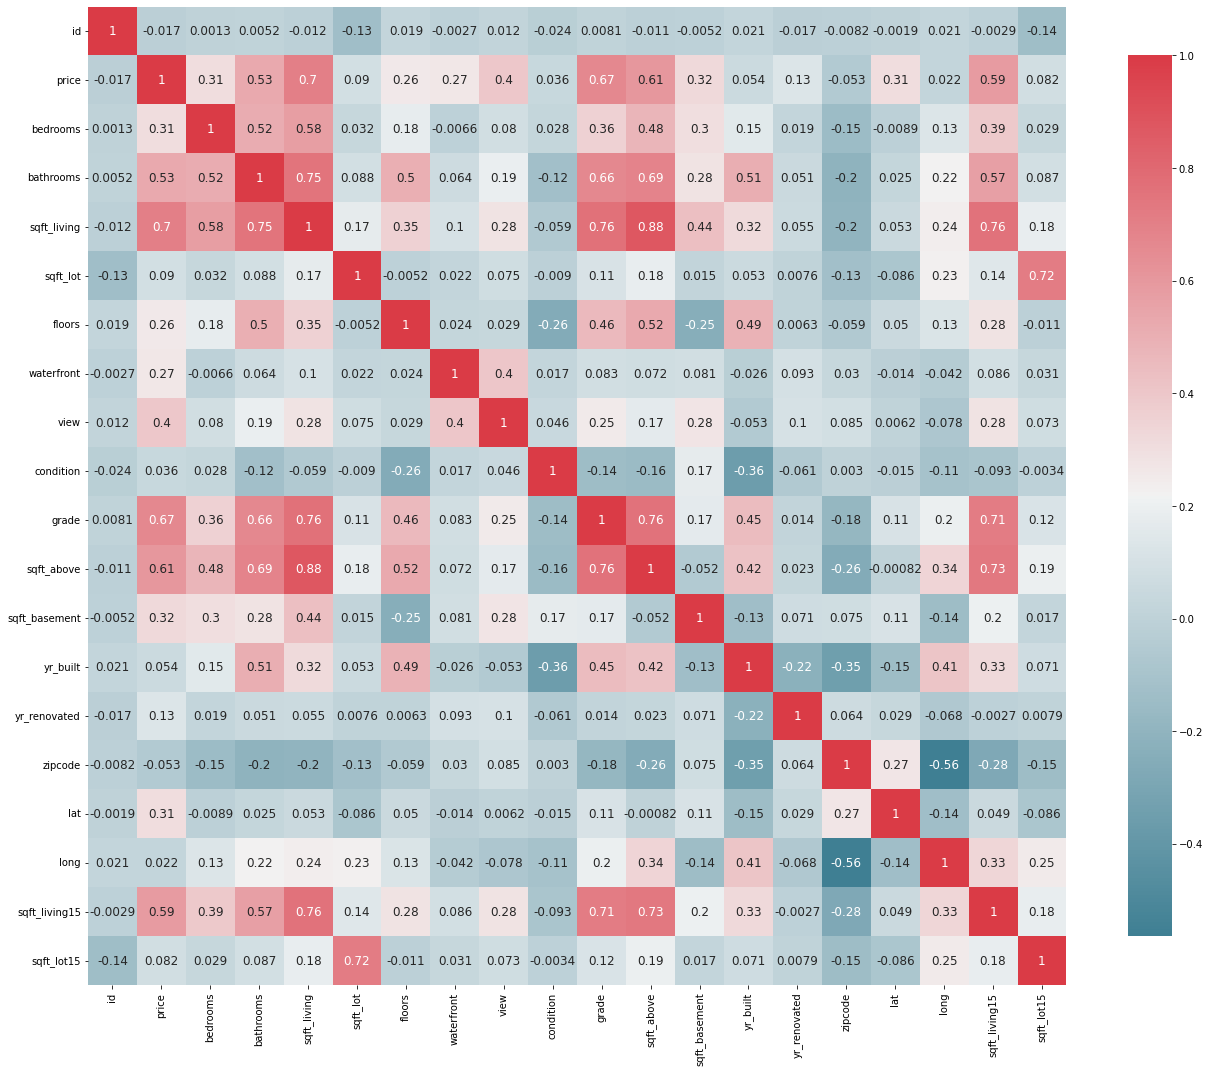

In [54]:
def plot_correlation_map(df):
    corr = df.corr()
    s , ax = plt.subplots(figsize = (22 , 18))
    cmap = sns.diverging_palette(220 , 10 , as_cmap = True)
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map(df)

Text(0.5, 1.0, 'view')

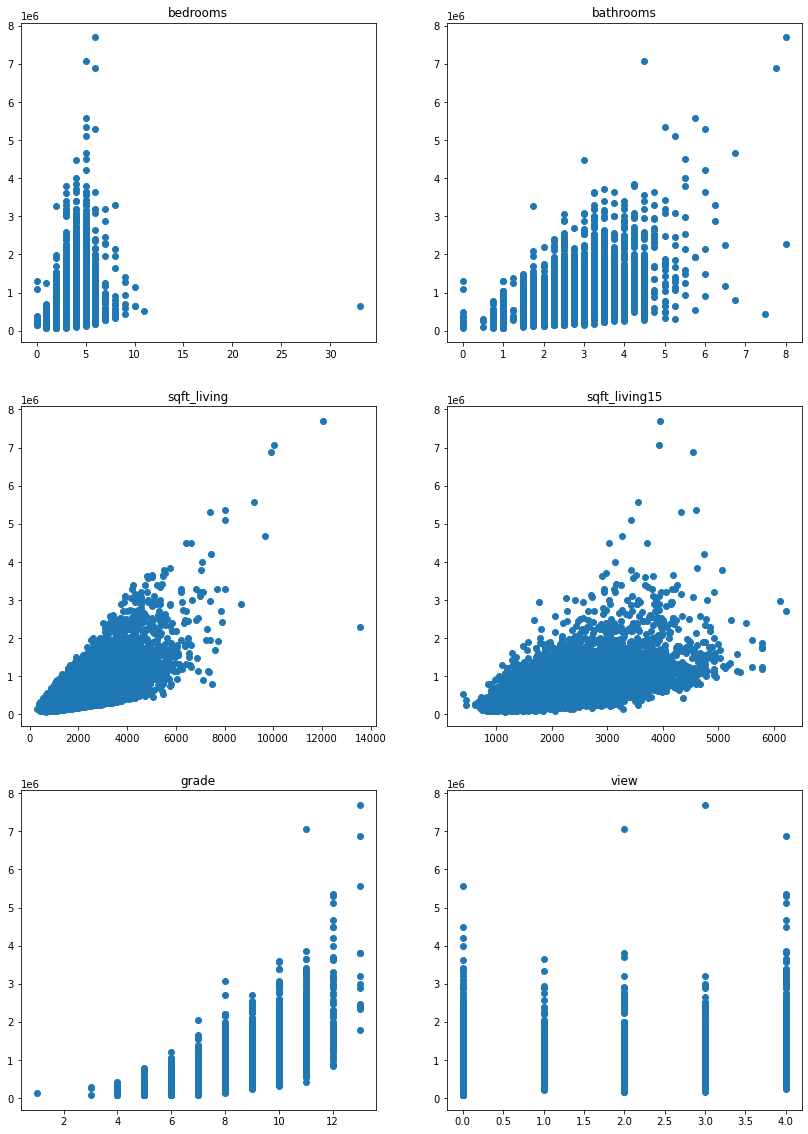

In [69]:
plt.figure(figsize = (14 , 20))
plt.subplot(3, 2, 1)
plt.scatter(df['bedrooms'], df['price'])
plt.title("bedrooms")
plt.subplot(3, 2, 2)
plt.scatter(df['bathrooms'], df['price'])
plt.title("bathrooms")
plt.subplot(3, 2, 3)
plt.scatter(df['sqft_living'], df['price'])
plt.title("sqft_living")
plt.subplot(3, 2, 4)
plt.scatter(df['sqft_living15'], df['price'])
plt.title("sqft_living15")
plt.subplot(3, 2, 5)
plt.scatter(df['grade'], df['price'])
plt.title("grade")
plt.subplot(3, 2, 6)
plt.scatter(df['view'], df['price'])
plt.title("view")
plt.show()

In [55]:
df = df.drop(['id', 'date', 'sqft_lot15', 'long', 'lat', 'zipcode', 'yr_renovated', 'yr_built', 'sqft_basement', 'sqft_above', 'condition', 'waterfront', 'floors', 'sqft_lot'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,view,grade,sqft_living15
0,221900.0,3,1.00,1180,0,7,1340
1,538000.0,3,2.25,2570,0,7,1690
2,180000.0,2,1.00,770,0,6,2720
3,604000.0,4,3.00,1960,0,7,1360
4,510000.0,3,2.00,1680,0,8,1800


The heatmap above shows the correlation between the different columns of the dataframe, the study of this graph allow us to identify the relationships that exist between these columns and to select the features that have the most impact on our target the price. We can observe in our case certain correlations which could be useful for feature selection:
- price and bedrooms: correlation coefficient = 0.31
- price and bathrooms: correlation coefficient = 0.53
- price and sqft_living: correlation coefficient = 0.70
- price and grade: correlation coefficient = 0.67
- price and sqft_living15: correlation coefficient = 0.59

Scatters palso help us in our feature selection.
We select bedrooms, bathrooms, sqft_living, grade and sqft_living15 as features.

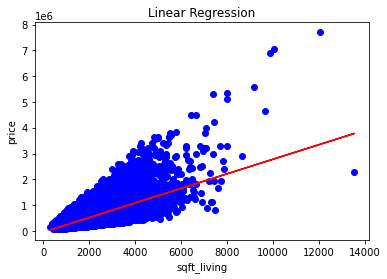

MSE 62451720102.954
R squared 0.5035535751151091


In [123]:
X=df[['sqft_living']]
y=df['price'].values

#Splitting dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=40)

#Applying Linear Regression
model = LinearRegression()   
model.fit(X_train,y_train)  
predicted = model.predict(X_test) 

#Plotting
plt.figure()
plt.scatter(X,y,color='b')
plt.title('Linear Regression')
plt.ylabel('price')
plt.xlabel('sqft_living')
plt.plot(X,model.predict(X),color='r')
plt.show()

print("MSE", metrics.mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

The R squared for the input variable sqft_living is around 0.50, this value means half of the output variation can be explained by the model's input.

In [122]:
X=df[['sqft_living', 'grade', 'view']]
y=df[['price']]

#Splitting dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=40)

#Applying Linear Regression
model = LinearRegression()   
model.fit(X_train,y_train)  
predicted = model.predict(X_test) 

print("MSE", metrics.mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 53209588104.63046
R squared 0.5770219020293736


If we compare the linear model and the multi-linear model, we observe a slight increase in R squared which goes from 0.50 for the linear model to 0.57 for the multi-linear model. There is also a decrease in the MSE on the multi-linear model. From there we can say that the multi-linear model is a little more precise than the linear model.

In [120]:
#Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

lg = LinearRegression()

#Applying Polynomial Regression
poly = PolynomialFeatures(degree=3)
X_train_fit = poly.fit_transform(X_train)
lg.fit(X_train_fit, y_train)
X_test_ = poly.fit_transform(X_test)
predicted = lg.predict(X_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  48307026831.49974
R squared:  0.6159937512084285


For the Polynomial model there is an increase of R squared and a decrease of MSE compared to linear and multi-linear models. We can conclude that the Polynomial model fit data better than linear and multi-linear models.